# === Searborn ===

**Seaborn merupakan API yang berdasar dari Matplotlib, memiliki high-level function untuk tipe plot yang umum digunakan untuk statistik, Seaborn juga dapat diintegrasikan dengan DataFrames dari Pandas.**

# Seaborn vs Matplotlib

**Matplotlib**

In [1]:
import matplotlib.pyplot as plt

In [3]:
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

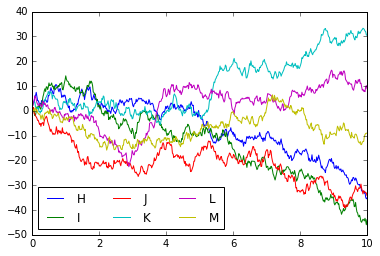

In [7]:
# buat beberapa data
sat = np.random.RandomState(0)
x = np.linspace(0,10,500)
y= np.cumsum(sat.randn(500, 6), 0)

# plot data menggunakan setting default Matplotlib
plt.plot(x,y)
plt.legend('HIJKLM', ncol=3, loc='lower left')
plt.show()

**Seaborn** 

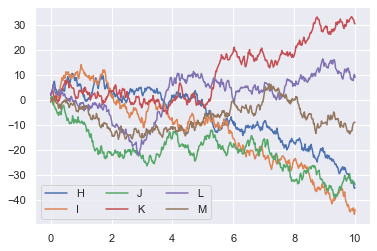

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
sns.set()

# menggunakan data yang sama dengan di atas

# buat beberapa data
sat = np.random.RandomState(0)
x = np.linspace(0,10,500)
y= np.cumsum(sat.randn(500, 6), 0)


plt.plot(x,y)
plt.legend('HIJKLM', ncol=3, loc='lower left')

# Exploring Seaborn Plots

**Mari kita lihat beberapa jenis plot yang tersedia di Seaborn. Catatan: contoh berikut dapat dihasilkan menggunakan perintah Matplotlib, tapi menggukan API Seaborn akan lebih menyenangkan.**

# 1.  Histogram, KDE, dan Density

**Histogram**

**Seringkali pada visualisasi data statistika, yang kita perlukan hanyalah histogram dan joint distribution dari beberapa variabel. Contoh histogram sebagai berikut:**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

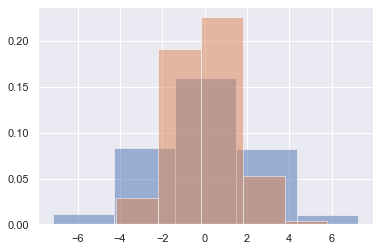

In [8]:
data = np.random.multivariate_normal([0,0],[[5,2],[2,2]], size=2000)
data = pd.DataFrame(data, columns=['x','y'])

for col in 'xy':
    plt.hist(data[col], bins=5, density=True, alpha=0.5)

**Kita juga dapat menghasilkan estimasi yang tidak kasar dari distribusi tersebut menggunakan kernel density estimation (KDE) yang dapat dihasilkan menggunakan Seaborn dengan _sns.kdeplot_:**

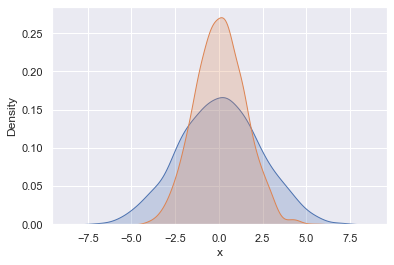

In [9]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)


C:\Users\yuan_dhika\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\yuan_dhika\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


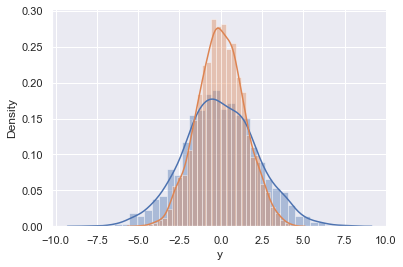

In [12]:
data = np.random.multivariate_normal([0,0],[[5,2],[2,2]], size=2000)
data = pd.DataFrame(data, columns=['x','y'])
sns.distplot(data['x'])
sns.distplot(data['y']);

**Jika kita menggunakan kedua data dari dataset ke dalam kdeplot, maka akan menghasilkan visualisasi dua-dimensi dari data tersebut:**

C:\Users\yuan_dhika\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


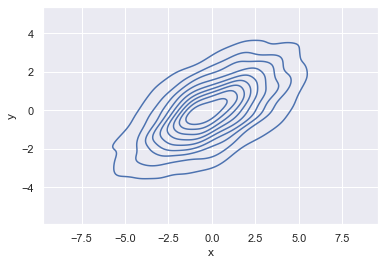

In [14]:
sns.kdeplot(data['x'], data['y']);

**Kita dapat melihat joint distribution dan marginal distribution secara bersamaan menggunakan sns.jointplot. Untuk plot ini, kita gunakan style white background:**

C:\Users\yuan_dhika\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


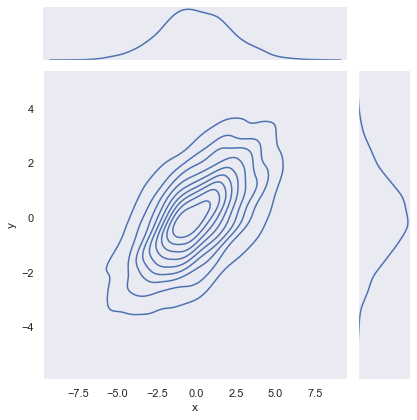

In [18]:
with sns.axes_style('dark'):
    sns.jointplot(data['x'], data['y'], kind='kde')

**Ada beberapa parameter lain yang dapat kita ganti pada jointplot, contohnya adalah kita dapat menggunkaan histogram dengan base hexagonal:**

C:\Users\yuan_dhika\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


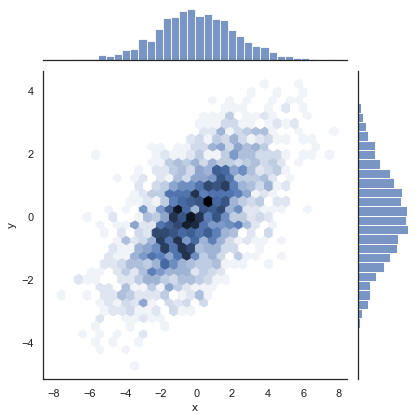

In [19]:
with sns.axes_style('white'):
    sns.jointplot(data['x'], data['y'], kind='hex')

# 2.  Pair Plots

**Ketika kita membuat joint plot menggunakan dataset dengan dimensi yang lebih besar, maka akan menghasilkan pair plots, yang sangat berguna untuk mengeksplorasi hubungan antar data multidimensi, juga melihat pair plots secara berpasangan.**

In [20]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Mem-visualisasikan dengan mudah hubungan multidimensi dari beberapa sampel menggunakan sns.pairplot:**

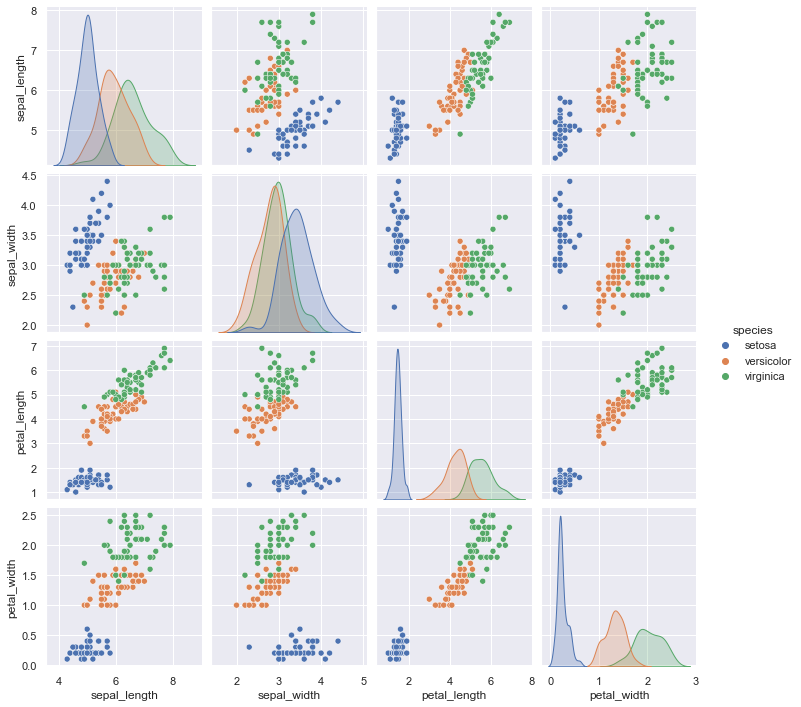

In [21]:
sns.pairplot(iris, hue='species')

# 3. Faceted Histogram

**Terkadang, langkah terbaik ntuk menganalisa data adalah menggunakan histogram dari bagian-bagiannya. FacetGrid milik Seaborn menjadikan langkah ini sangat mudah. Kita akan menggunakan data 'tips' dari dataset Seaborn:**

In [22]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


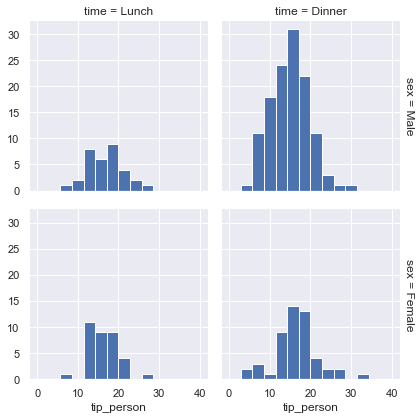

In [27]:
tips['tip_person'] = 100*tips['tip'] / tips['total_bill']

grid=sns.FacetGrid(tips, row='sex',col='time',margin_titles=True)
grid.map(plt.hist, 'tip_person', bins=np.linspace(0,40,15));

# 4. Categorical Plots

**Categorical plots dapat juga digunakan untuk menampilkan visualisasi semacam ini. Kita dapat melihat distribusi sebuah parameter dalam bins yang memiliki nilai dari parameter lain:**

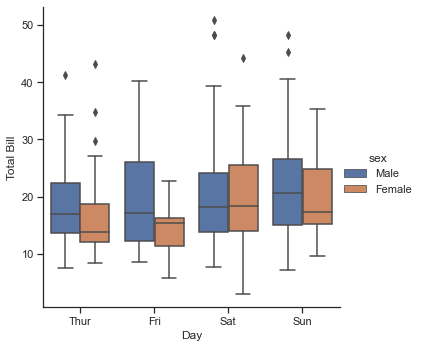

In [45]:
with sns.axes_style(style='ticks'):
    g = sns.catplot('day','total_bill','sex',data=tips, kind='box')
    g.set_axis_labels('Day','Total Bill')

# 5.  Joint Distributions

**Seperti pair plot yang sudah kita bahas, kita dapat menggunakan sns.jointplot untuk menampilkan joint distribution antara dataset yang berbeda, seiring dengan marginal distributions-nya:**

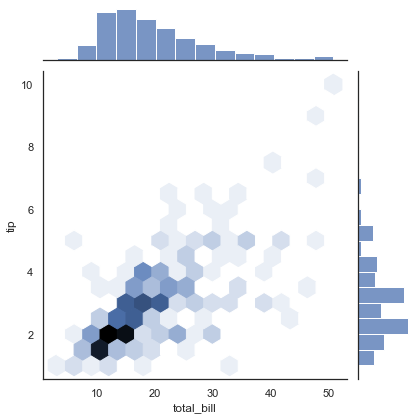

In [31]:
with sns.axes_style('white'):
    sns.jointplot('total_bill','tip',data=tips, kind='hex')

**Joint plot juga dapat melakukan kernel density estimation dan regression secara otomatis:**

C:\Users\yuan_dhika\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


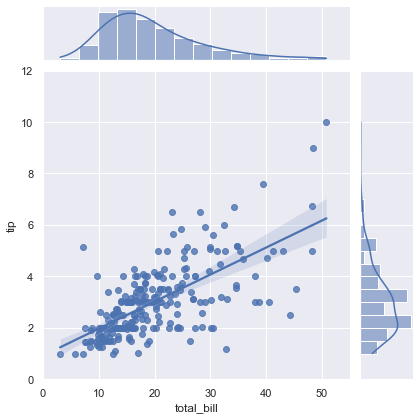

In [41]:
from scipy import stats
sns.jointplot('total_bill','tip',data=tips,kind='reg', xlim=(0,55), ylim=(0,12));


# 6.  Bar Plots

**Time series data dapat ditampilkan menggunakan bar plot pada sns.catplot. Kali ini kita menggunakan dataset 'planets' yang ada pada Seaborn:**

In [42]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


C:\Users\yuan_dhika\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


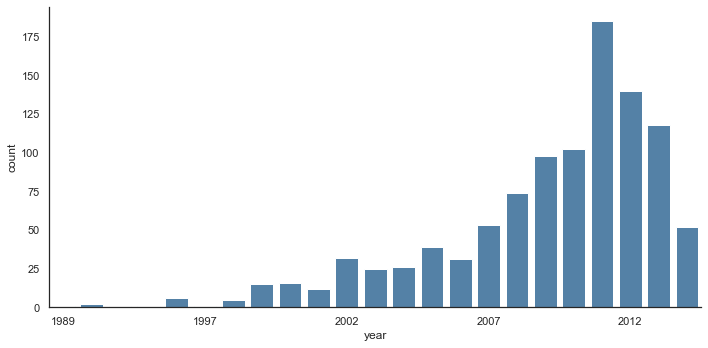

In [43]:
with sns.axes_style('white'):
    g = sns.catplot('year',data=planets, aspect=2,kind='count', color='steelblue')
    g.set_xticklabels(step=5)

In [46]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [47]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [48]:
df_group = df.groupby('cut').mean()

In [57]:
df_group.head()

,carat,depth,table,price,x,y,z
cut,,,,,,,
Ideal,0.702837,61.709401,55.951668,3457.541970,5.507451,5.520080,3.401448
Premium,0.891955,61.264673,58.746095,4584.257704,5.973887,5.944879,3.647124
Very Good,0.806381,61.818275,57.956150,3981.759891,5.740696,5.770026,3.559801
Good,0.849185,62.365879,58.694639,3928.864452,5.838785,5.850744,3.639507
Fair,1.046137,64.041677,59.053789,4358.757764,6.246894,6.182652,3.982770


,cut
0,Ideal
1,Premium
2,Good
3,Premium
4,Good
...,...
53935,Ideal
53936,Good
53937,Very Good
53938,Premium


C:\Users\yuan_dhika\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


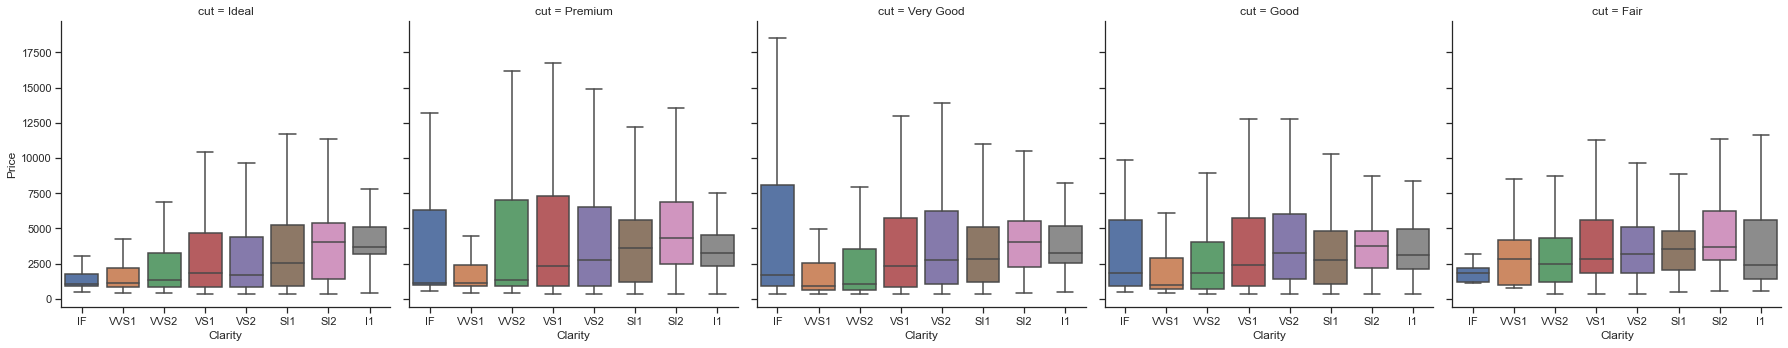

In [81]:
with sns.axes_style(style='ticks'):
    g = sns.catplot('clarity','price',col='cut',data=df, kind='box',fliersize=0)
    g.set_axis_labels('Clarity','Price')

In [83]:
print(df['clarity'].values)

['SI2', 'SI1', 'VS1', 'VS2', 'SI2', ..., 'SI1', 'SI1', 'SI1', 'SI2', 'SI2']
Length: 53940
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']


C:\Users\yuan_dhika\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


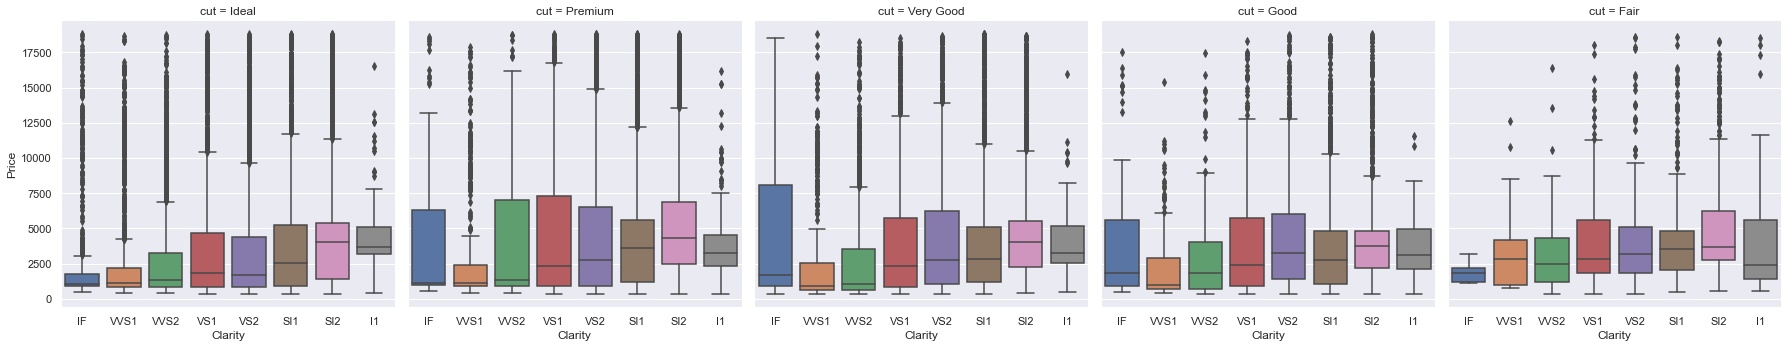

In [70]:
g = sns.catplot('clarity','price',col='cut',data=df, kind='box')
g.set_axis_labels('Clarity','Price')

## Trik : Cara ambil data dari DF secara acak 

In [85]:
df.sample(n=300)

,carat,cut,color,clarity,depth,table,price,x,y,z
15116,1.01,Premium,D,SI1,61.8,58.0,6075,6.42,6.37,3.95
43520,0.59,Ideal,F,SI1,62.0,53.0,1424,5.38,5.43,3.35
29072,0.30,Very Good,E,VVS2,62.5,61.0,688,4.23,4.28,2.66
9118,1.12,Very Good,I,SI2,61.2,59.0,4533,6.69,6.74,4.11
37984,0.32,Ideal,D,VVS2,60.9,57.0,1008,4.39,4.45,2.70
...,...,...,...,...,...,...,...,...,...,...
41796,0.50,Ideal,E,SI1,60.6,57.0,1250,5.19,5.14,3.13
49,0.29,Very Good,H,SI2,60.7,60.0,404,4.33,4.37,2.64
27784,0.44,Very Good,F,SI2,62.8,60.0,648,4.82,4.86,3.04
47118,0.62,Ideal,H,VS1,61.8,54.0,1828,5.50,5.53,3.41


In [86]:
with sns.style(style='white'):
    sns.jointplot(df['carat'], df['price'], kind='kde')

AttributeError: module 'seaborn' has no attribute 'style'